<div id='toc'></div>

In [1]:
TFile file("NewEvents.root");

In [2]:
//genral definition to use Tree
#define PI 3.14159265
TTree* tree =(TTree*) file.Get("events");
Int_t nTracks, detectors[100];
Double_t theta[100],clusterEnergy[100],vetoEnergy[100],phi[100];
Float_t elab[2],ebeam,dircos[2][3],theta_t[2],plab[2];

tree->SetBranchAddress("nTracks",&nTracks);
tree->SetBranchAddress("detectors",detectors);
tree->SetBranchAddress("theta",theta);
tree->SetBranchAddress("phi",phi);
tree->SetBranchAddress("clusterEnergy",clusterEnergy);
tree->SetBranchAddress("vetoEnergy",vetoEnergy);
tree->SetBranchAddress("elab",elab);
tree->SetBranchAddress("plab",plab);
tree->SetBranchAddress("theta_t",theta_t);
tree->SetBranchAddress("ebeam",&ebeam);
tree->SetBranchAddress("dircos",dircos);



In [4]:
// definition of proton energy, neutron energy and neutron polar angle as a function of
// proton polar angly and beam enrgy
#define PI 3.14159265

Double_t E_n(Double_t Eg,  Double_t zp,Double_t Md=1.875, Double_t Mp=0.938, Double_t Mn=0.939){
     Double_t E=(1.0/2.0)*(-2*std::pow(Eg, 3)*std::pow(zp, 2) + 2*std::pow(Eg, 3) - 2*std::pow(Eg, 2)*Md*std::pow(zp, 2) + 4*std::pow(Eg, 2)*Md + 3*Eg*std::pow(Md, 2) + Eg*std::pow(Mn, 2) - Eg*std::pow(Mp, 2) - Eg*zp*std::sqrt(4*std::pow(Eg, 2)*std::pow(Md, 2) + 4*std::pow(Eg, 2)*std::pow(Mp, 2)*std::pow(zp, 2) - 4*std::pow(Eg, 2)*std::pow(Mp, 2) + 4*Eg*std::pow(Md, 3) - 4*Eg*Md*std::pow(Mn, 2) - 4*Eg*Md*std::pow(Mp, 2) + std::pow(Md, 4) - 2*std::pow(Md, 2)*std::pow(Mn, 2) - 2*std::pow(Md, 2)*std::pow(Mp, 2) + std::pow(Mn, 4) - 2*std::pow(Mn, 2)*std::pow(Mp, 2) + std::pow(Mp, 4)) + std::pow(Md, 3) + Md*std::pow(Mn, 2) - Md*std::pow(Mp, 2))/(-std::pow(Eg, 2)*std::pow(zp, 2) + std::pow(Eg, 2) + 2*Eg*Md + std::pow(Md, 2));
    return E;

} 

In [5]:
Double_t E_p(Double_t Eg,  Double_t zp,Double_t Md=1.875, Double_t Mp=0.938, Double_t Mn=0.939){
    Double_t Ep=(2*std::pow(Eg, 2)*Md + 3*Eg*std::pow(Md, 2) - Eg*std::pow(Mn, 2) + Eg*std::pow(Mp, 2) + Eg*zp*std::sqrt(4*std::pow(Eg, 2)*std::pow(Md, 2) + 4*std::pow(Eg, 2)*std::pow(Mp, 2)*std::pow(zp, 2) - 4*std::pow(Eg, 2)*std::pow(Mp, 2) + 4*Eg*std::pow(Md, 3) - 4*Eg*Md*std::pow(Mn, 2) - 4*Eg*Md*std::pow(Mp, 2) + std::pow(Md, 4) - 2*std::pow(Md, 2)*std::pow(Mn, 2) - 2*std::pow(Md, 2)*std::pow(Mp, 2) + std::pow(Mn, 4) - 2*std::pow(Mn, 2)*std::pow(Mp, 2) + std::pow(Mp, 4)) + std::pow(Md, 3) - Md*std::pow(Mn, 2) + Md*std::pow(Mp, 2))/(-2*std::pow(Eg, 2)*std::pow(zp, 2) + 2*std::pow(Eg, 2) + 4*Eg*Md + 2*std::pow(Md, 2));
    return Ep;
    }

In [6]:
Double_t z_n(Double_t Eg,  Double_t zp,Double_t Md=1.875, Double_t Mp=0.938, Double_t Mn=0.939){
    Double_t zn=(Eg - zp*std::sqrt(-std::pow(Mp, 2) + std::pow(Eg + Md - 1.0/2.0*(2*std::pow(Eg, 3)*std::pow(zp, 2) - 2*std::pow(Eg, 3) + 2*std::pow(Eg, 2)*Md*std::pow(zp, 2) - 4*std::pow(Eg, 2)*Md - 3*Eg*std::pow(Md, 2) - Eg*std::pow(Mn, 2) + Eg*std::pow(Mp, 2) + Eg*zp*std::sqrt(4*std::pow(Eg, 2)*std::pow(Md, 2) + 4*std::pow(Eg, 2)*std::pow(Mp, 2)*std::pow(zp, 2) - 4*std::pow(Eg, 2)*std::pow(Mp, 2) + 4*Eg*std::pow(Md, 3) - 4*Eg*Md*std::pow(Mn, 2) - 4*Eg*Md*std::pow(Mp, 2) + std::pow(Md, 4) - 2*std::pow(Md, 2)*std::pow(Mn, 2) - 2*std::pow(Md, 2)*std::pow(Mp, 2) + std::pow(Mn, 4) - 2*std::pow(Mn, 2)*std::pow(Mp, 2) + std::pow(Mp, 4)) - std::pow(Md, 3) - Md*std::pow(Mn, 2) + Md*std::pow(Mp, 2))/(std::pow(Eg, 2)*std::pow(zp, 2) - std::pow(Eg, 2) - 2*Eg*Md - std::pow(Md, 2)), 2)))/std::sqrt(-std::pow(Mn, 2) + (1.0/4.0)*std::pow(2*std::pow(Eg, 3)*std::pow(zp, 2) - 2*std::pow(Eg, 3) + 2*std::pow(Eg, 2)*Md*std::pow(zp, 2) - 4*std::pow(Eg, 2)*Md - 3*Eg*std::pow(Md, 2) - Eg*std::pow(Mn, 2) + Eg*std::pow(Mp, 2) + Eg*zp*std::sqrt(4*std::pow(Eg, 2)*std::pow(Md, 2) + 4*std::pow(Eg, 2)*std::pow(Mp, 2)*std::pow(zp, 2) - 4*std::pow(Eg, 2)*std::pow(Mp, 2) + 4*Eg*std::pow(Md, 3) - 4*Eg*Md*std::pow(Mn, 2) - 4*Eg*Md*std::pow(Mp, 2) + std::pow(Md, 4) - 2*std::pow(Md, 2)*std::pow(Mn, 2) - 2*std::pow(Md, 2)*std::pow(Mp, 2) + std::pow(Mn, 4) - 2*std::pow(Mn, 2)*std::pow(Mp, 2) + std::pow(Mp, 4)) - std::pow(Md, 3) - Md*std::pow(Mn, 2) + Md*std::pow(Mp, 2), 2)/std::pow(std::pow(Eg, 2)*std::pow(zp, 2) - std::pow(Eg, 2) - 2*Eg*Md - std::pow(Md, 2), 2));
    return zn;
}

# Neutronefficiency

In [7]:
TH1F *h_p2 =new TH1F("proton","proton", 100,0,1300);
TH1F *h_n2 =new TH1F("neutron","neutron", 100,0,1300);
TH1F *h_phi_diff =new TH1F("phi difference","phi difference", 100,-13,13);
TH1F *h_theta_diff =new TH1F("theta difference","theta difference", 100,-13,13);
TH2F *h_Ep_Eg2 = new TH2F("Ebeam_Eproton","Ebeam_Eproton", 100,0,1300, 100,0,1300);
TH2F *theta_neut = new TH2F("theta neutron","theta neutron", 100,0,180, 100,0,180);
TH2F *theta_neut_En = new TH2F("theta neutron","theta neutron", 100,0,180, 100,0,1300);


for(int i =0,N= tree->GetEntries(); i< N; ++i){
    tree->GetEntry(i);

        if(nTracks>=1){
        for (int k=0; k<nTracks;k++){
 if ( detectors[k]==7 or detectors[k]==3 or detectors[k]==6 or detectors[k]==5 or detectors[k]==40 ){ // 
                if (vetoEnergy[k]>0.7){
                    
                    
                    double zp=cos(theta[k]* PI / 180.0 );
                   
                    h_p2->Fill(E_n(ebeam,zp)*1000-938,1);// fülle für jedes proton das histogramm
                    
                    h_Ep_Eg2->Fill(elab[0]*1000-938,E_p(ebeam,zp)*1000-938);
                        for(int l=0; l<nTracks;l++ ){ // überprüfen ob es für dieses proton auch ein neutron gefunden wurde
                           if(k==l){
                               continue;
                            } 
                           else {
                               auto diff_theta=acos(z_n(ebeam,zp))*(180.0 / PI)-theta[l];
                                             
                               h_theta_diff->Fill(diff_theta);
                               h_phi_diff->Fill(abs(phi[l])+abs(phi[k])-180);
                                if(abs(phi[l])+abs(phi[k])<=(180+1.5*6.03)){ 
                                       if( abs(phi[l])+abs(phi[k])>=(180-1.5*6.03)){
                                         if(detectors[l]==1){
                                             
                                             
                                             theta_neut->Fill(acos(z_n(ebeam,zp))*(180.0 / PI),theta[l]);
                                             
                                             if (diff_theta<=2*5.01){
                                                 if(diff_theta>=-2*5.01){
                                                     theta_neut_En->Fill(theta[k],E_n(ebeam,zp)*1000-939);
                                                      h_n2->Fill(E_n(ebeam,zp)*1000-939,1);
                                                     
                                                    
                                                     break;
                                                     
                                                 }
                                             }
                                             
                                             
                                        }  
                                 
                                    }                                 
                                }
                            }
                        }     
                     break;
                            
                        }
            

    
    
                }
            }
        }

    }

Warning in <TFile::Append>: Replacing existing TH1: theta neutron (Potential memory leak).


## proton selction

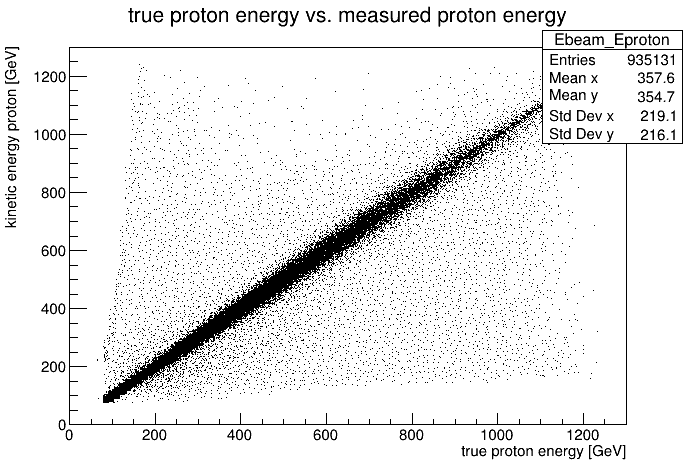

In [8]:
TCanvas c4;
h_Ep_Eg2->SetTitle("true proton energy vs. measured proton energy");
h_Ep_Eg2->GetYaxis()->SetTitle("kinetic energy proton [GeV]"); 
h_Ep_Eg2->GetXaxis()->SetTitle(" true proton energy [GeV]"); 

h_Ep_Eg2->Draw("");
c4.Draw();

## comparision true and calculated polar angle neutron

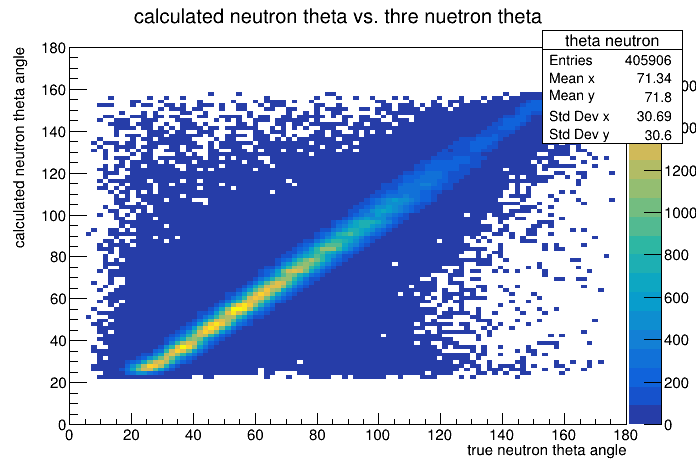

In [9]:
TCanvas c4;
theta_neut->SetTitle("calculated neutron theta vs. thre nuetron theta");
theta_neut->GetYaxis()->SetTitle("calculated neutron theta angle"); 
theta_neut->GetXaxis()->SetTitle(" true neutron theta angle"); 

theta_neut->Draw("colz");
c4.Draw();

## Determination of theta and phi cut

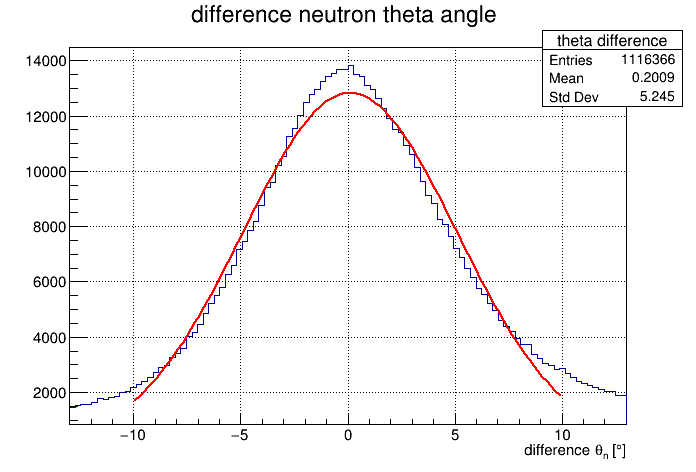

 FCN=2640.29 FROM MIGRAD    STATUS=CONVERGED      77 CALLS          78 TOTAL
                     EDM=2.29316e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.28237e+04   2.27745e+01   4.19500e-01  -7.44724e-07
   2  Mean         1.21064e-01   7.47683e-03   1.87085e-04   7.42124e-03
   3  Sigma        5.00102e+00   7.89149e-03   1.04089e-05   3.78351e-02


In [10]:
// diffrence between calculated and true polar angle

TF1 *fc=new TF1("fc","gaus",-10,10);
TCanvas c4;
h_theta_diff->SetTitle("difference neutron theta angle ");

h_theta_diff->GetYaxis()->SetTitle(""); 
h_theta_diff->GetXaxis()->SetTitle(" difference #theta_{n} [#circ]"); 
h_theta_diff->Fit("fc","R");
h_theta_diff->Draw("");
c4.SetGrid();
c4.Draw();




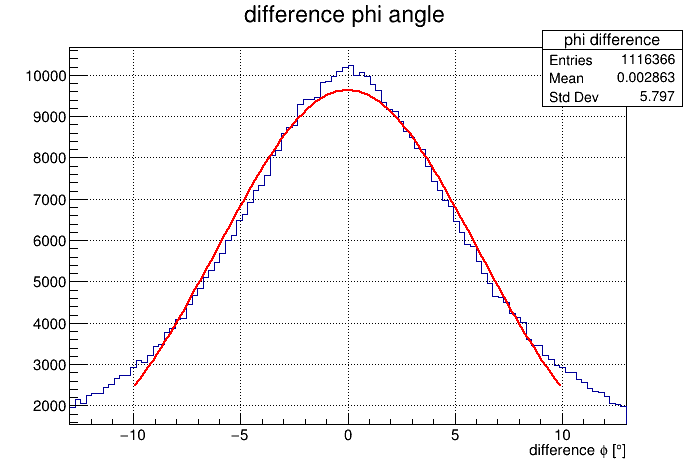

 FCN=886.734 FROM MIGRAD    STATUS=CONVERGED      78 CALLS          79 TOTAL
                     EDM=1.94765e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.63217e+03   1.88054e+01   1.97559e-01   1.56781e-06
   2  Mean         3.50475e-03   1.07905e-02   1.56982e-04  -5.78067e-02
   3  Sigma        6.02785e+00   1.31252e-02   8.71994e-06   2.56683e-02


In [11]:
// difference of the sum of both phi angles (for proton and neutron) and 180 degree

TF1 *fp=new TF1("fp","gaus",-10,10);
TCanvas c4;
h_phi_diff->SetTitle("difference phi angle ");

h_phi_diff->GetYaxis()->SetTitle(""); 
h_phi_diff->GetXaxis()->SetTitle(" difference #phi [#circ]"); 
h_phi_diff->Fit("fp","R");
h_phi_diff->Draw("");
c4.SetGrid();
c4.Draw();


## proton  neutron selction

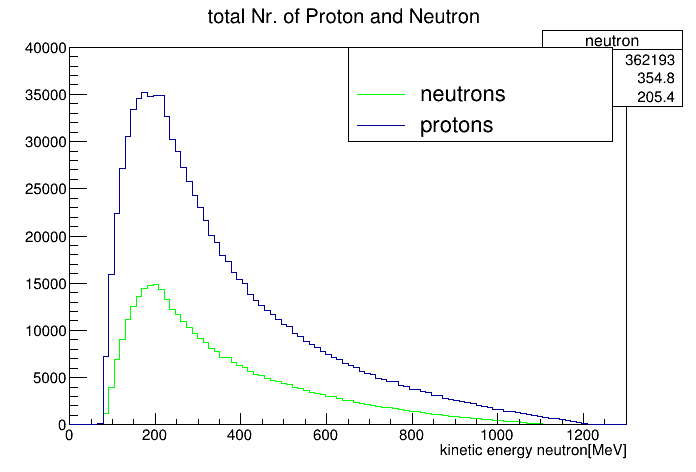

In [12]:


h_n2->SetLineColor(kGreen);
h_n2->GetXaxis()->SetTitle("kinetic energy neutron[MeV]");  
h_n2->SetTitle(" total Nr. of Proton and Neutron");



TCanvas* c= new TCanvas();
h_n2->GetYaxis()->SetRangeUser(0,40000);
h_n2->Draw();
h_p2->Draw("Same");

c->Draw();
   auto legend = new TLegend(0.5,0.7,0.88,0.9);
    legend->SetHeader("","C"); // option "C" allows to center the header
   legend->AddEntry(h_n2," neutrons","l");
   legend->AddEntry(h_p2," protons","l");

   legend->Draw();
  

## neutron efficiency


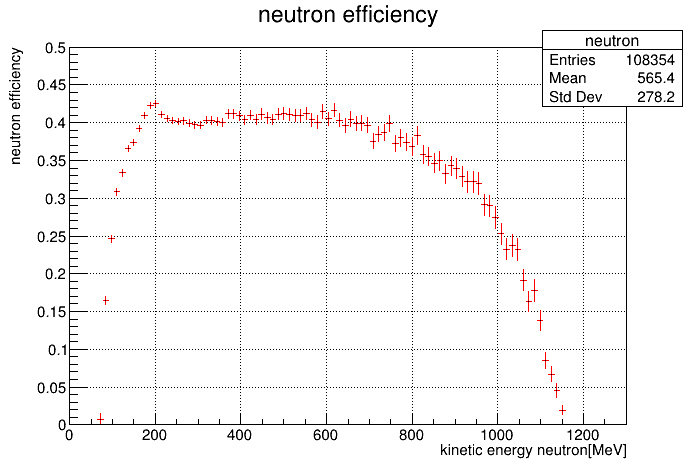

In [13]:
h_n2->Sumw2();
auto neut_eff = new TH1F(*h_n2);
neut_eff->Divide(h_p2);

TCanvas c4;
neut_eff->GetXaxis()->SetTitle(" kinetic energy neutron[MeV]"); 
neut_eff->GetYaxis()->SetTitle(" neutron efficiency"); 
neut_eff->SetLineColor(kRed);
neut_eff->GetYaxis()->SetRangeUser(0,0.5);
neut_eff->SetTitle("neutron efficiency");
neut_eff->Draw();
c4.SetGrid();
c4.Draw();


Due to low detector efficiency, at low energies the distribution goes to zero. The same applies for high energies, where also high energetic neutron can leave the CB without losing its whole enegry or the energy of the proton is to low to be detected.<br>
(increasment at 200Mev?)


## comparison with paper (neutron efficiency)

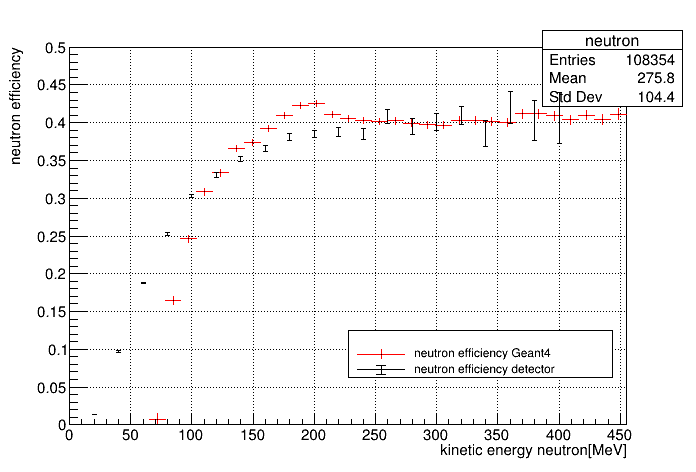

Info in <TCanvas::Print>: jpg file neuteff_paper.jpg has been created


In [14]:
// comparing the reconstructed efficiency with the experimental one


int n=21;
TH1* clone_E = (TH1*)neut_eff->Clone();
Double_t y[21]= {0,1.39,9.7,18.8,25.3,30.3,33.1,35.2,36.6,38.1,38.5,38.8,38.5,40.8,39.5,40.1,41.0,38.6,42.0,40.3,40.6};
Double_t x[21];
Double_t ey[21]={0,0.01,0.1,0.1,0.2,0.2,0.3,0.3,0.4,0.5,0.5,0.6,0.7,0.9,1.0,1.1,1.2,1.7,2.1,2.6,3.4};
Double_t ex[21];
   for (Int_t i=1; i<n; i++) {
      x[i] =x[i-1]+20;
       y[i]=y[i]/100;
       ey[i]=ey[i]/100;
       ex[i]=0.0;
      
       
   }

TGraphErrors *gr1 = new TGraphErrors(n, x, y,ex, ey);

TCanvas* c= new TCanvas();
gr1->SetTitle("neutronefficiency_measured");




clone_E->GetXaxis()->SetRangeUser(0,450);
clone_E->Draw();
clone_E->SetTitle("");
gr1->Draw("P");
c->SetGrid();
c->Draw();
   auto legend = new TLegend(0.5,0.2,0.88,0.3);
   legend->SetHeader("","C"); // option "C" allows to center the header
   legend->AddEntry(clone_E,"neutron efficiency Geant4","lep");
   legend->AddEntry(gr1,"neutron efficiency detector","lep");

   legend->Draw();
  